In [1]:
# reproduce ADMET and TOX21 results reported by orginial paper

import logging
import json
import csv
import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# load the original results on tox21 
df = pd.read_excel('oringinal reults/tox21_NYAN.xlsx')
dataset_name_list= df.values[:,0].tolist()
AUROC = df.values[:,1].tolist()
AUROC_std = df.values[:,2].tolist()
AUPRC = df.values[:,3].tolist()
AUPRC_std = df.values[:,4].tolist()
accuracy = df.values[:,5].tolist()
accuracy_std = df.values[:,6].tolist()

# append the mean performance
dataset_name_list.append('Avg.')
AUROC.append(np.mean(AUROC))
AUROC_std.append(np.mean(AUROC_std))
AUPRC.append(np.mean(AUPRC))
AUPRC_std.append(np.mean(AUPRC_std))
accuracy.append(np.mean(accuracy))
accuracy_std.append(np.mean(accuracy_std))

In [3]:
our_AUROC, our_AUROC_std,  our_AUPRC, our_AUPRC_std, our_accuracy, our_accuracy_std = [],[],[],[],[],[]
for dataset in dataset_name_list[0:-1]:
    df = pd.read_csv('./result_reproduction_tox21/{}.csv'.format(dataset))
    our_AUROC.append(df[['AUROC']].values.mean())
    our_AUROC_std.append(df[['AUROC']].values.std())
    our_AUPRC.append(df[['AUPRC']].values.mean())
    our_AUPRC_std.append(df[['AUPRC']].values.std())
    our_accuracy.append(df[['accuracy']].values.mean())
    our_accuracy_std.append(df[['accuracy']].values.std())

# append the mean performance
our_AUROC.append(np.mean(our_AUROC))
our_AUROC_std.append(np.mean(our_AUROC_std))
our_AUPRC.append(np.mean(our_AUPRC))
our_AUPRC_std.append(np.mean(our_AUPRC_std))
our_accuracy.append(np.mean(our_accuracy))
our_accuracy_std.append(np.mean(our_accuracy_std))

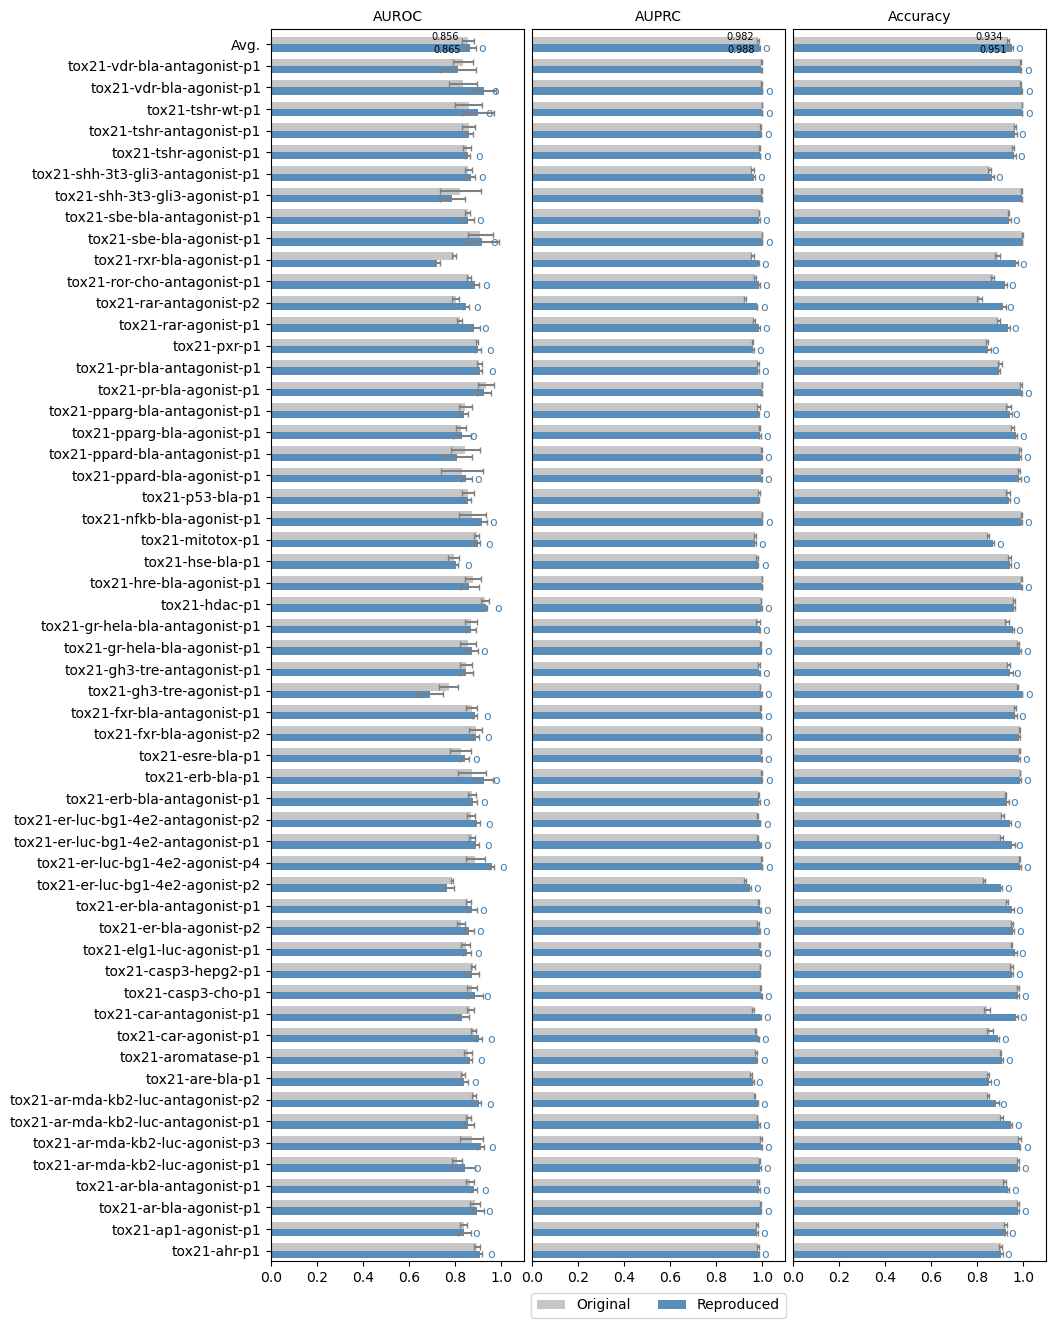

In [6]:
# the performance on tox21 of our retrained 350K model
textcolor = 'black'
dotcolor = 'steelblue'
orginalcolor = 'silver'
ourcolor = 'steelblue'

x = np.arange(57)
width = 0.34
fig = plt.figure(figsize=(10, 16))


ax1 = fig.add_subplot(1, 3, 1) 
ax1.barh(x+width/2, AUROC, height=width, color=orginalcolor, align='center', xerr=AUROC_std, ecolor='grey', capsize=2,
        alpha=0.9)
ax1.barh(x-width/2, our_AUROC, height=width, color=ourcolor, align='center', xerr=our_AUROC_std, ecolor='grey', capsize=2,
        alpha=0.9)
ax1.set_yticks(np.arange(57), dataset_name_list)
ax1.set_xticks([0.0,0.2,0.4,0.6, 0.8, 1.0])
ax1.set_ylim(-0.5, 56.7)
ax1.set_xlim(0, 1.1)


ax2 = fig.add_subplot(1, 3, 2) 
ax2.barh(x+width/2, AUPRC, height=width, color=orginalcolor, align='center', xerr=AUPRC_std, ecolor='grey',label='Original',
         capsize=2,alpha=0.9)
ax2.barh(x-width/2, our_AUPRC, height=width, color=ourcolor, align='center', xerr=our_AUPRC_std, ecolor='grey', label='Reproduced',
         capsize=2,alpha=0.9)
ax2.set_yticks([])
ax2.set_xticks([0.0,0.2,0.4,0.6, 0.8, 1.0])
ax2.set_ylim(-0.5, 56.7)
ax2.set_xlim(0, 1.1)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.02), ncol=3)


ax3 = fig.add_subplot(1, 3, 3)  
ax3.barh(x+width/2, accuracy, height=width, color=orginalcolor, align='center', xerr=accuracy_std, ecolor='grey', capsize=2, alpha=0.9)
ax3.barh(x-width/2, our_accuracy, height=width, color=ourcolor, align='center', xerr=our_accuracy_std, ecolor='grey', capsize=2,alpha=0.9)
ax3.set_ylim(-0.5, 56.7)
ax3.set_xticks([0.0,0.2,0.4,0.6, 0.8, 1.0])
ax3.set_yticks([])
ax3.set_xlim(0, 1.1)


# mark the avg. performance in figure
ax3.text(accuracy[-1]-0.08, 56.1, round(accuracy[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)
ax3.text(our_accuracy[-1]-0.08, 55.5, round(our_accuracy[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)
ax1.text(AUROC[-1]-0.1, 56.1, round(AUROC[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)
ax1.text(our_AUROC[-1]-0.1, 55.5, round(our_AUROC[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)
ax2.text(AUPRC[-1]-0.08, 56.1, round(AUPRC[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)
ax2.text(our_AUPRC[-1]-0.08, 55.5, round(our_AUPRC[-1],3), ha='center', va='bottom', color=textcolor,fontsize=7)

for i in range(57):
    if our_accuracy[i]>=accuracy[i]:
        ax3.text(our_accuracy[i]+0.03, i-0.5, 'o', ha='center', va='bottom', color=dotcolor,fontsize=9)
    if our_AUROC[i]>=AUROC[i]:
        ax1.text(our_AUROC[i]+0.05, i-0.5, 'o', ha='center', va='bottom', color=dotcolor,fontsize=9)
    if our_AUPRC[i]>=AUPRC[i]:
        ax2.text(our_AUPRC[i]+0.03, i-0.5, 'o', ha='center', va='bottom', color=dotcolor,fontsize=9)
 
ax3.set_title('Accuracy', fontsize=10)
ax1.set_title('AUROC',fontsize=10)
ax2.set_title('AUPRC',fontsize=10)
plt.subplots_adjust(hspace=0.1, wspace=0.03)

 
plt.show()
fig.savefig('figures/reproduction_tox21.pdf', bbox_inches='tight', pad_inches=0.1)
plt.close()

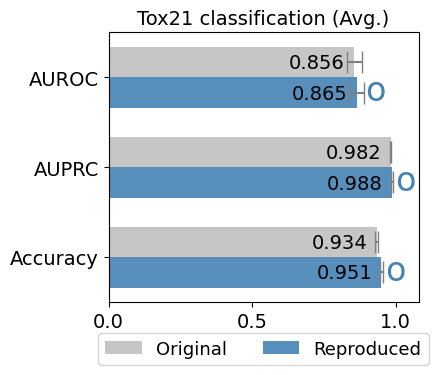

In [17]:
# averaged performace on tox21
our_avg = [our_accuracy[-1], our_AUPRC[-1], our_AUROC[-1]]
our_avg_std = [our_accuracy_std[-1], our_AUPRC_std[-1], our_AUROC_std[-1]]
original_avg= [accuracy[-1], AUPRC[-1], AUROC[-1]]
original_avg_std = [accuracy_std[-1], AUPRC_std[-1], AUROC_std[-1]]

textcolor = 'black'
dotcolor = 'steelblue'
orginalcolor = 'silver'
ourcolor = 'steelblue'

x = np.arange(3)
width = 0.34
fig = plt.figure(figsize=(4,3.5))

plt.barh(x+width/2, original_avg, height=width, color=orginalcolor, align='center', xerr=original_avg_std, ecolor='grey', capsize=8,
        label='Original',alpha=0.9)
for i, value in enumerate(original_avg):  
    value = round(value,3)
    x_pos = value-0.13
    plt.text(x_pos, i+width/6, value, ha='center', va='bottom', color=textcolor, fontsize=14)
    
plt.barh(x-width/2, our_avg, height=width, color=ourcolor, align='center', xerr=our_avg_std, ecolor='grey', capsize=8,
        label='Reproduced',alpha=0.9)
for i, value in enumerate(our_avg):  
    value = round(value,3)
    x_pos = value-0.13
    plt.text(x_pos, i-5*width/6, value, ha='center', va='bottom', color=textcolor, fontsize=14)

plt.ylim(-0.5, 2.5)
plt.xticks([0, 0.5, 1.0],fontsize=14)
plt.yticks(np.arange(3), ['Accuracy','AUPRC','AUROC'],fontsize=14)
plt.xlim(0, 1.08)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, fontsize=13)


plt.text(our_avg[0]+0.05, 0-0.33, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)
plt.text(our_avg[1]+0.045, 1-0.33, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)
plt.text(our_avg[2]+0.065, 2-0.33, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)

plt.title('Tox21 classification (Avg.)', fontsize=14)

plt.show()
fig.savefig('figures/reproduction_tox21_avg.pdf', bbox_inches='tight', pad_inches=0.1)
plt.close()


In [18]:
# load the original results on ADMET
df = pd.read_excel('oringinal reults/ADMET_NYAN.xlsx')
dataset_name_list= df.values[:,0].tolist()
AUROC = df.values[:,1].tolist()
AUROC_std = df.values[:,2].tolist()
AUPRC = df.values[:,3].tolist()
AUPRC_std = df.values[:,4].tolist()
accuracy = df.values[:,5].tolist()
accuracy_std = df.values[:,6].tolist()

In [19]:
# dataset_name = 'Pgp_Broccatelli'
our_AUROC,  our_AUPRC, our_accuracy = [],[],[]
for dataset in dataset_name_list:
    df = pd.read_csv('./result_reproduction_ADMET/{}.csv'.format(dataset))
    our_AUROC.append(df[['AUROC']].values.squeeze())
    our_AUPRC.append(df[['AUPRC']].values.squeeze())
    our_accuracy.append(df[['accuracy']].values.squeeze())

our_AUROC_mean = np.array(our_AUROC).mean(1)
our_AUROC_std = np.array(our_AUROC).std(1)
our_AUPRC_mean = np.array(our_AUPRC).mean(1)
our_AUPRC_std = np.array(our_AUPRC).std(1)
our_accuracy_mean = np.array(our_accuracy).mean(1)
our_accuracy_std = np.array(our_accuracy).std(1)

In [22]:
dataset_name_list = ['CYP2D6\nVeith', 'Pgp\nBroccatelli', 'BBB\nMartins']

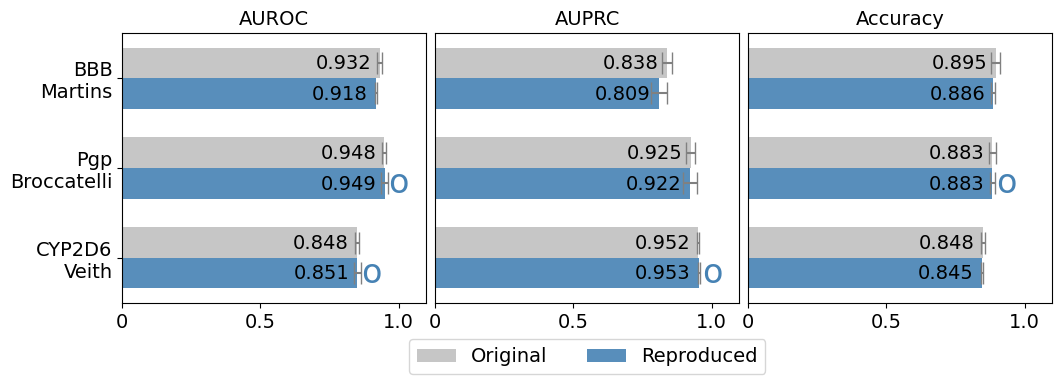

In [25]:
# the performance on ADMET of our retrained 350K model
textcolor = 'black'
dotcolor = 'steelblue'
orginalcolor = 'silver'
ourcolor = 'steelblue'


x = np.arange(3)
width = 0.34
fig = plt.figure(figsize=(12,3.5))


# AUROC
ax1 = fig.add_subplot(1, 3, 1) 
ax1.barh(x+width/2, AUROC, height=width, color=orginalcolor, align='center', xerr=AUROC_std, ecolor='grey', capsize=8,
         alpha=0.9)
for i, value in enumerate(AUROC):  
    value = round(value,3)
    x_pos = value-0.13
    ax1.text(x_pos, i+width/6, value, ha='center', va='bottom', color=textcolor,fontsize=14)
    
ax1.barh(x-width/2, our_AUROC_mean, height=width, color=ourcolor, align='center', xerr=our_AUROC_std, ecolor='grey', capsize=8,
          alpha=0.9)
for i, value in enumerate(our_AUROC_mean):  
    value = round(value,3)
    x_pos = value-0.13
    ax1.text(x_pos, i-width*5/6, value, ha='center', va='bottom', color=textcolor,fontsize=14)

ax1.set_yticks(np.arange(3), dataset_name_list, fontsize=14)
ax1.set_ylim(-0.5, 2.5)
ax1.set_xlim(0, 1.1)
ax1.set_xticks([0,0.5,1])
ax1.set_xticklabels([0,0.5,1.0], fontsize=14)


# AUPRC
ax2 = fig.add_subplot(1, 3, 2) 
ax2.barh(x+width/2, AUPRC, height=width, color=orginalcolor, align='center', xerr=AUPRC_std, ecolor='grey', label='Original',
         capsize=8, alpha=0.9)
for i, value in enumerate(AUPRC):  
    value = round(value,3)
    x_pos = value-0.13
    ax2.text(x_pos, i+width/6, value, ha='center', va='bottom', color=textcolor,fontsize=14)
ax2.barh(x-width/2, our_AUPRC_mean, height=width, color=ourcolor, align='center', xerr=our_AUPRC_std, ecolor='grey',label='Reproduced',
         capsize=8, alpha=0.9)
for i, value in enumerate(our_AUPRC_mean):  
    value = round(value,3)
    x_pos = value-0.13
    ax2.text(x_pos, i-width*5/6, value, ha='center', va='bottom', color=textcolor, fontsize=14)
ax2.set_yticks([])
ax2.set_ylim(-0.5, 2.5)
ax2.set_xlim(0, 1.1)
ax2.set_xticks([0,0.5,1])
ax2.set_xticklabels([0,0.5,1.0], fontsize=14)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3,fontsize=14)



# Accuracy
ax3 = fig.add_subplot(1, 3, 3)  
ax3.barh(x+width/2, accuracy, height=width, color=orginalcolor, align='center', xerr=accuracy_std, ecolor='grey', capsize=8, alpha=0.9)
for i, value in enumerate(accuracy):  
    value = round(value,3)
    x_pos = value-0.13
    ax3.text(x_pos, i+width/6, value, ha='center', va='bottom',color=textcolor,fontsize=14)
    
ax3.barh(x-width/2, our_accuracy_mean, height=width, color=ourcolor, align='center', xerr=our_accuracy_std, ecolor='grey', capsize=8,
         alpha=0.9)
for i, value in enumerate(our_accuracy_mean):  
    value = round(value,3)
    x_pos = value-0.13
    ax3.text(x_pos, i-width*5/6, value, ha='center', va='bottom', color=textcolor,fontsize=14)
ax3.set_ylim(-0.5, 2.5)
ax3.set_xlim(0, 1.1)
ax3.set_yticks([])
ax3.set_xticks([0,0.5,1])
ax3.set_xticklabels([0,0.5,1.0], fontsize=14)
 
ax3.set_title('Accuracy', fontsize=14)
ax1.set_title('AUROC',fontsize=14)
ax2.set_title('AUPRC',fontsize=14)
plt.subplots_adjust(hspace=0.1, wspace=0.03)

for i in range(3):
    if our_accuracy_mean[i]>=accuracy[i]:
        ax3.text(our_accuracy_mean[i]+0.05, i-0.36, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)
    if our_AUROC_mean[i]>=AUROC[i]:
        ax1.text(our_AUROC_mean[i]+0.05, i-0.36, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)
    if our_AUPRC_mean[i]>=AUPRC[i]:
        ax2.text(our_AUPRC_mean[i]+0.05, i-0.36, 'o', ha='center', va='bottom', color=dotcolor,fontsize=24)

 
plt.show()
fig.savefig('figures/reproduction_ADMET.pdf', bbox_inches='tight', pad_inches=0.1)
plt.close()

In [26]:
our_accuracy

[array([0.84463062, 0.84501142, 0.84767708, 0.84006093, 0.84952381]),
 array([0.90163934, 0.87704918, 0.88065844, 0.87295082, 0.88477366]),
 array([0.87684729, 0.88669951, 0.87931034, 0.89408867, 0.89408867])]

In [27]:
dataset_name_list

['CYP2D6\nVeith', 'Pgp\nBroccatelli', 'BBB\nMartins']

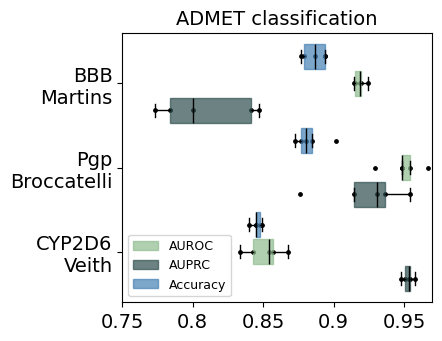

In [34]:
figure, ax = plt.subplots(figsize=(4,3.5))

bp1=ax.boxplot(our_AUROC, positions =[1,2,3], medianprops={'color': 'black', 'linewidth': 1}, vert=False,widths=0.3,
            patch_artist=True, boxprops={'color': 'darkseagreen', 'facecolor': 'darkseagreen','alpha':0.7},showfliers=False)

bp2=ax.boxplot(our_AUPRC, positions =[0.68,1.68,2.68], medianprops={'color': 'black', 'linewidth': 1}, vert=False,widths=0.3,
            patch_artist=True, boxprops={'color': 'darkslategrey', 'facecolor': 'darkslategrey','alpha':0.7},showfliers=False)

bp3=ax.boxplot(our_accuracy, positions =[1.32,2.32,3.32], labels=dataset_name_list, medianprops={'color': 'black', 'linewidth': 1}, 
               vert=False,
            patch_artist=True, boxprops={'color': 'steelblue', 'facecolor': 'steelblue','alpha':0.7},showfliers=False,widths=0.3)

ax.set_yticks([1,2,3], dataset_name_list,fontsize=14)


# dots for accuracy
for i, pos in enumerate([1.32,2.32,3.32]):
    plt.scatter(our_accuracy[i], [pos]*5, color='black', s=6)

# dots for AUROC
for i, pos in enumerate([1,2,3]):
    plt.scatter(our_AUROC[i], [pos]*5, color='black', s=6)

# dots for AUPRC
for i, pos in enumerate([0.68,1.68,2.68]):
    plt.scatter(our_AUPRC[i], [pos]*5, color='black', s=6)
    
ax.legend([bp1["boxes"][0],bp2["boxes"][0],bp3["boxes"][0]],['AUROC','AUPRC','Accuracy'],loc='lower left',fontsize=9)
ax.set_xlim(0.75, 0.97)
ax.set_ylim(0.4, 3.6)
ax.set_xticks([0.75,0.80,0.85,0.90,0.95])
ax.set_xticklabels([0.75,0.80,0.85,0.90,0.95], fontsize=14)
ax.set_title('ADMET classification',fontsize=14)

figure.savefig('figures/reproduction_ADMET_box.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()